## SciPy

### PDF and CDF

- PDF = Proabablity Density Function
- CDF = Cumulative Distribution Function

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from scipy.stats import norm

In [10]:
x = np.linspace(-6,6,1000)

In [11]:
fx = norm.pdf(x,loc=0,scale=1)

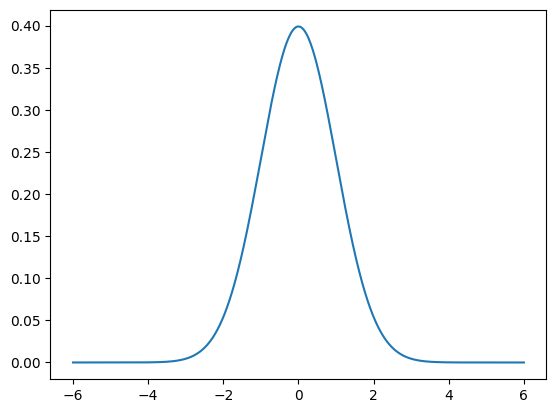

In [12]:
plt.plot(x, fx);

In [13]:
FX = norm.cdf(x,loc=0,scale=1)

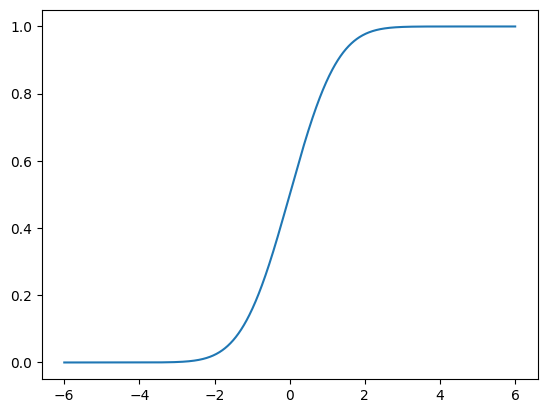

In [14]:
plt.plot(x,FX);

In [16]:
logfx = norm.logpdf(x, loc=0, scale=1)

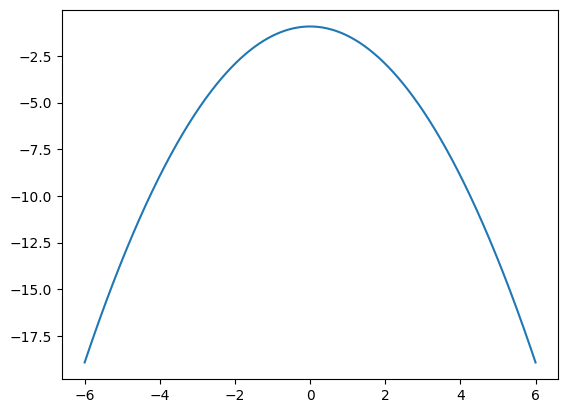

In [17]:
plt.plot(x, logfx)

### Convolution

In [18]:
from PIL import Image

In [21]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Mangekyou_Sharingan_Sasuke_%28Eternal%29.svg/300px-Mangekyou_Sharingan_Sasuke_%28Eternal%29.svg.png

--2024-01-11 18:03:21--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Mangekyou_Sharingan_Sasuke_(Eternal).svg/300px-Mangekyou_Sharingan_Sasuke_(Eternal).svg.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19338 (19K) [image/png]
Saving to: '300px-Mangekyou_Sharingan_Sasuke_(Eternal).svg.png'

     0K .......... ........                                   100%  501K=0.04s

2024-01-11 18:03:21 (501 KB/s) - '300px-Mangekyou_Sharingan_Sasuke_(Eternal).svg.png' saved [19338/19338]



In [75]:
!wget https://t4.ftcdn.net/jpg/05/70/26/97/360_F_570269734_gE4Za4bdlmm5MLhjScliP4zmOORgDJ3t.jpg

--2024-01-11 18:50:35--  https://t4.ftcdn.net/jpg/05/70/26/97/360_F_570269734_gE4Za4bdlmm5MLhjScliP4zmOORgDJ3t.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.153.167
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.153.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86202 (84K) [image/jpeg]
Saving to: '360_F_570269734_gE4Za4bdlmm5MLhjScliP4zmOORgDJ3t.jpg'

     0K .......... .......... .......... .......... .......... 59%  837K 0s
    50K .......... .......... .......... ....                 100% 4.17M=0.07s

2024-01-11 18:50:36 (1.21 MB/s) - '360_F_570269734_gE4Za4bdlmm5MLhjScliP4zmOORgDJ3t.jpg' saved [86202/86202]



In [76]:
im = Image.open('360_F_570269734_gE4Za4bdlmm5MLhjScliP4zmOORgDJ3t.jpg')

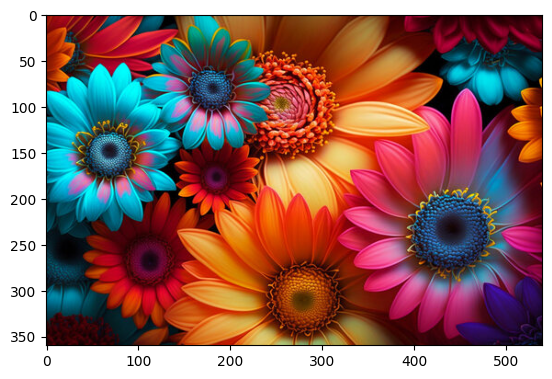

In [77]:
plt.imshow(im);

In [78]:
gray = np.mean(im,axis=2)

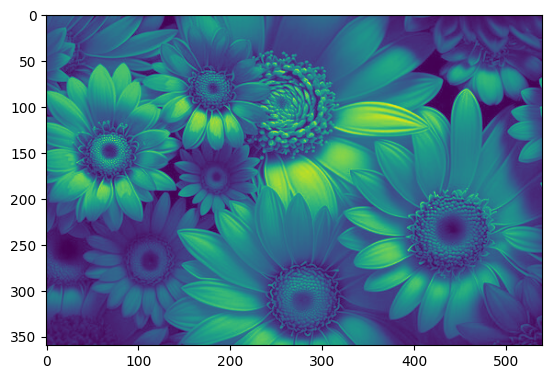

In [79]:
plt.imshow(gray);

In [80]:
x = np.linspace(-6, 6, 50)

In [81]:
fx = norm.pdf(x, loc=0, scale=1)

In [82]:
filt = np.outer(fx, fx)

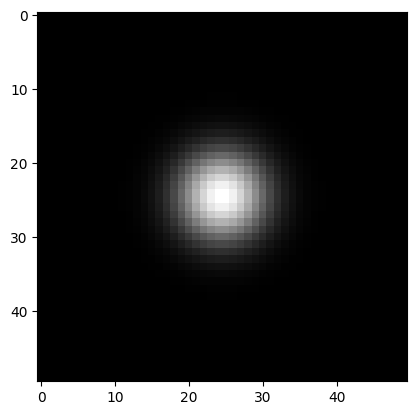

In [83]:
plt.imshow(filt, cmap='gray');

In [84]:
from scipy.signal import convolve2d

In [85]:
out = convolve2d(gray, filt)

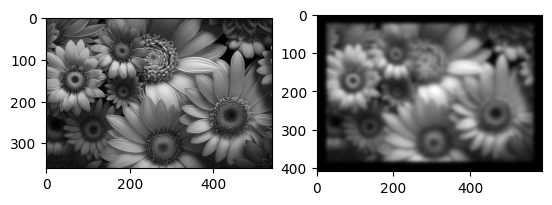

In [86]:
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out,cmap='gray')

### Scipy Exercise

- Implement Edge Detection
- Step 1: convolve Hx & Hy with grayscale image to obtain Gx & Gy
- Step 2: take G = sqrt(Gx^2 + Gy^2)(this is the edge-detected output)

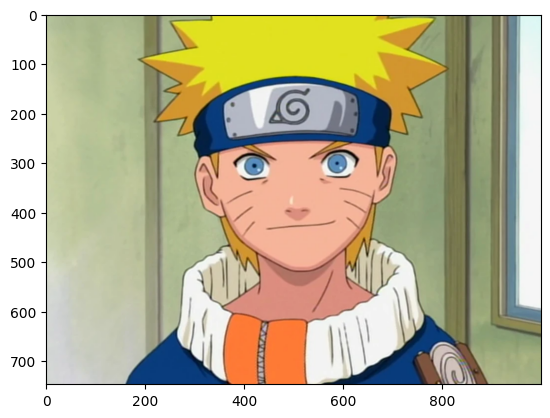

In [130]:
im = Image.open('Naruto_newshot.webp')
plt.imshow(im);

In [131]:
gray = np.mean(im,axis=2)

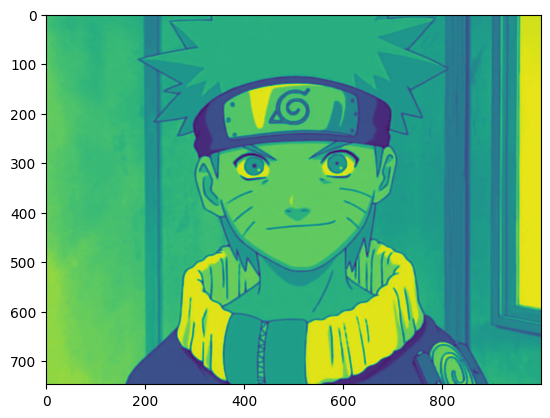

In [132]:
plt.imshow(gray);

In [133]:
Hx = np.array([[1,0,-1],
              [2,0,-2],
              [1,0,-1]])

In [134]:
fx1 = norm.pdf(Hx, loc=0, scale=1)

In [135]:
filt1 = np.outer(fx1, fx1)

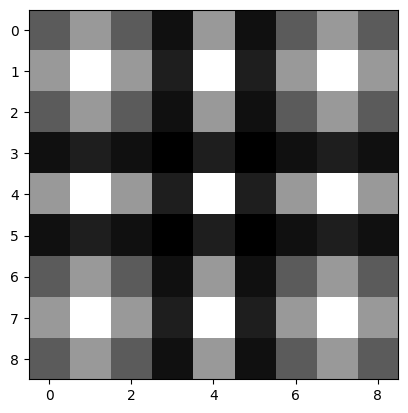

In [136]:
plt.imshow(filt1, cmap='gray');

In [137]:
Gx = convolve2d(gray, filt1)

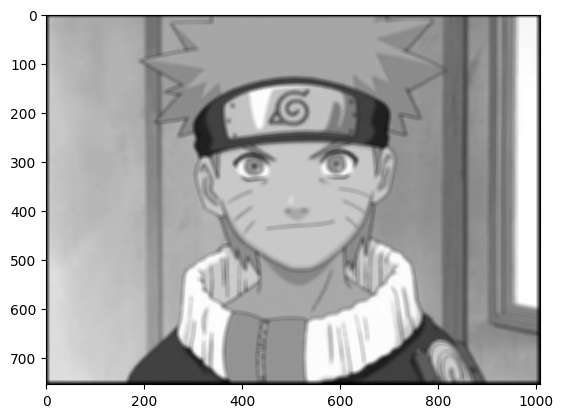

In [138]:
plt.imshow(Gx,cmap='gray');

In [139]:
Hy = np.array([[1,2,1],
              [0,0,0],
              [-1,-2,-1]])

In [140]:
fx2 = norm.pdf(Hy, loc=0, scale=1)

In [141]:
filt2 = np.outer(fx2, fx2)

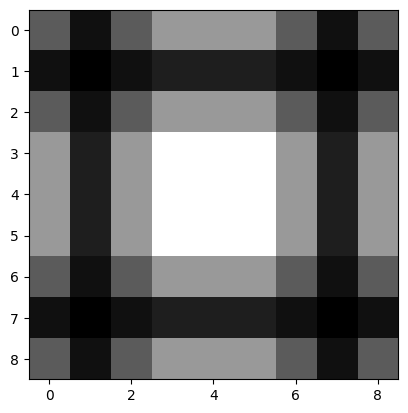

In [142]:
plt.imshow(filt2, cmap='gray');

In [143]:
Gy = convolve2d(gray, filt2)

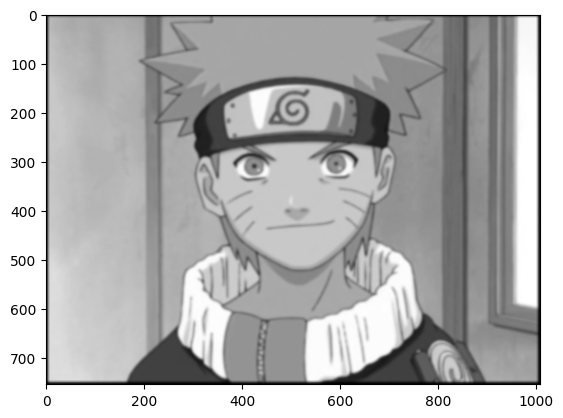

In [144]:
plt.imshow(Gy,cmap='gray');

In [147]:
G = np.sqrt((Gx)**2 + (Gy)**2)

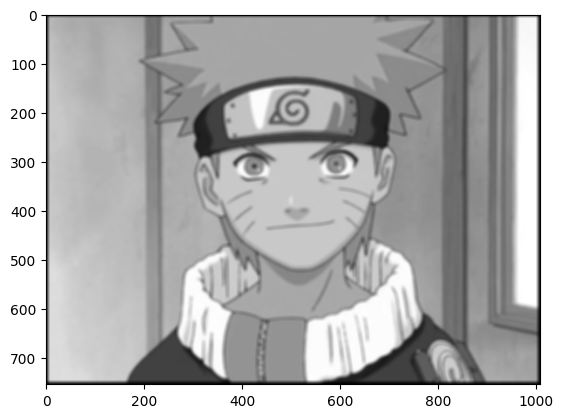

In [148]:
plt.imshow(G,cmap='gray');

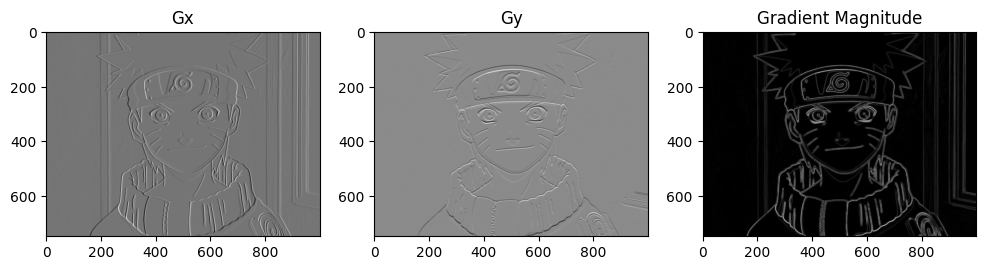

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

# Load the image
im = Image.open('Naruto_newshot.webp')

# Convert to grayscale
gray = np.mean(im, axis=2)

# Define the Hx and Hy filters
Hx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Hy = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

# Convolve the image with the filters
Gx = convolve2d(gray, Hx, mode='same', boundary='symm')
Gy = convolve2d(gray, Hy, mode='same', boundary='symm')

# Compute the magnitude of the gradient
G = np.sqrt(Gx**2 + Gy**2)

# Display the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(Gx, cmap='gray')
plt.title('Gx')

plt.subplot(132)
plt.imshow(Gy, cmap='gray')
plt.title('Gy')

plt.subplot(133)
plt.imshow(G, cmap='gray')
plt.title('Gradient Magnitude')

plt.show()


Text(0.5, 1.0, 'Gradient Magnitude')

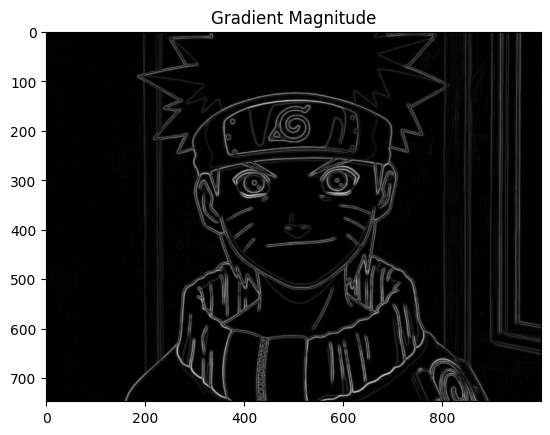

In [156]:
plt.imshow(G, cmap='gray')
plt.title('Gradient Magnitude')